In [25]:
### MINI PROJEKT
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn.preprocessing as skl_pre
import sklearn.linear_model as skl_lm
import sklearn.discriminant_analysis as skl_da

#from IPython.display import set_matplotlib_formats
#set_matplotlib_formats('png')
from IPython.core.pylabtools import figsize
figsize(10, 6) # Width and hight
#plt.style.use('seaborn-white')jupyter notebook --help-all

import sklearn.model_selection as skl_ms
import sklearn.metrics as skl_met

import itertools
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn.preprocessing as skl_pre
import sklearn.linear_model as skl_lm
import sklearn.discriminant_analysis as skl_da
import sklearn.neighbors as skl_nb

#from IPython.display import set_matplotlib_formats
#set_matplotlib_formats('png')
from IPython.core.pylabtools import figsize
figsize(10, 6) # Width and hight
#plt.style.use('seaborn-white')

In [26]:
import os
os.getcwd()

'/home/jovyan/work/project'

In [27]:
url = 'train.csv'
dataset = pd.read_csv(url, na_values='?', dtype={'ID': str}).dropna().reset_index()

In [28]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1039 entries, 0 to 1038
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   index                                 1039 non-null   int64  
 1   Number words female                   1039 non-null   int64  
 2   Total words                           1039 non-null   int64  
 3   Number of words lead                  1039 non-null   float64
 4   Difference in words lead and co-lead  1039 non-null   int64  
 5   Number of male actors                 1039 non-null   int64  
 6   Year                                  1039 non-null   int64  
 7   Number of female actors               1039 non-null   int64  
 8   Number words male                     1039 non-null   int64  
 9   Gross                                 1039 non-null   float64
 10  Mean Age Male                         1039 non-null   float64
 11  Mean Age Female  

In [29]:
# sampling indices for training
np.random.seed(1) # such that we may reproduce results
trainI = np.random.choice(dataset.shape[0], size=700, replace=False)
# biopsy.shape[0] ger antalet rader, biopsy.shape[1] ger antalet kolonner
trainIndex = dataset.index.isin(trainI) #Vilka index från dataset är med i trainI?
train = dataset.iloc[trainIndex] #training set
test = dataset.iloc[~trainIndex] #test set (~ betyder komplementet)import sklearn.discriminant_analysis as skl_da

In [30]:
X = dataset[dataset.columns[1:14]]
Y = dataset['Lead']

# List of models
models = []
models.append(skl_lm.LogisticRegression(solver='liblinear'))
models.append(skl_da.LinearDiscriminantAnalysis())
models.append(skl_da.QuadraticDiscriminantAnalysis())

# Split randomized data into training and validation (30% validation)
X_train, X_val, Y_train, Y_val = skl_ms.train_test_split(X,Y, test_size=0.3, random_state=1)

for m in range(np.shape(models)[0]):
    print('Results for: ' + str(models[m]))
    model = models[m]
    model.fit(X_train, Y_train)
    prediction = model.predict(X_val)
    predict_prob = model.predict_proba(X_val)
    prediction = np.empty(len(X_val), dtype=object)
    prediction = np.where(predict_prob[:,0]>1/2, 'Female', 'Male')

    # Confusion matrix
    print("Confusion matrix: \n")
    print(pd.crosstab(prediction, Y_val), '\n')

    # Accuracy
    print(f"Accuracy: {np.mean(prediction == Y_val):.3f}")
    
        
    

Results for: LogisticRegression(solver='liblinear')
Confusion matrix: 

Lead    Female  Male
row_0               
Female      44    14
Male        23   231 

Accuracy: 0.881
Results for: LinearDiscriminantAnalysis()
Confusion matrix: 

Lead    Female  Male
row_0               
Female      44    15
Male        23   230 

Accuracy: 0.878
Results for: QuadraticDiscriminantAnalysis()
Confusion matrix: 

Lead    Female  Male
row_0               
Female      39     6
Male        28   239 

Accuracy: 0.891


/opt/conda/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [31]:

def pre_process(raw_data):
    data = raw_data.copy()
    
    data['Lead'] = pd.get_dummies(data['Lead'])
    data['Number of words co-lead'] = data['Number of words lead'] - data['Difference in words lead and co-lead']
    data['Proportion of words lead'] = data['Number of words lead']/data['Total words']
    data['Proportion of words co-lead'] = data['Number of words co-lead']/data['Total words']
    data['Ratio words co-lead lead'] = data['Number of words co-lead']/data['Number of words lead']
    data['Proportion of words female'] = data['Number words female']/(data['Total words'] - data['Number of words lead'])
    data['Proportion of female actors'] = data['Number of female actors']/(data['Number of male actors'] + data['Number of female actors'])
    data['Older lead'] = data['Age Lead'] < data['Age Co-Lead']
    data['Older lead'] = pd.get_dummies(data['Older lead'])
    #data['Talks more'] = data['Number words female'] < data['Number words male']
    #data['Talks more'] = pd.get_dummies(data['Talks more']) ## 1 if males talke more than female 0 else
    data['Number of actors'] = data['Number of male actors'] + data['Number of female actors']
     
    return data




Model accuracy for model QuadraticDiscriminantAnalysis() is 
0.9423636363636363


{'whiskers': [<matplotlib.lines.Line2D at 0x7fe2e7989fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe2e79976d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe2e7989c70>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe2e7997d90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe2e79a2130>],
 'means': []}

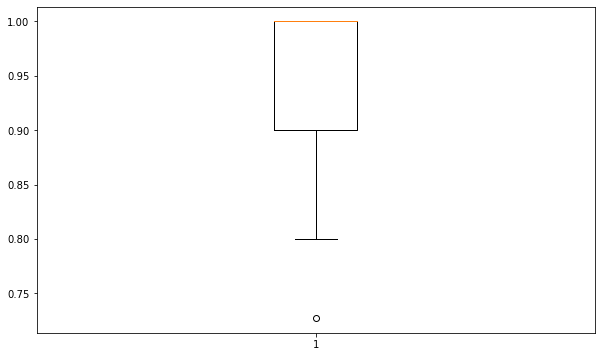

In [32]:
#X = dataset[dataset.columns[1:14]]

X = pre_process(dataset).drop(columns=['Lead'])
X=X[{'Year',
    'Gross',
    'Number of actors',
    'Proportion of female actors',
    'Mean Age Male',
    'Mean Age Female',
    'Age Lead',
    'Age Co-Lead',
    'Total words',
    'Proportion of words lead',
    'Proportion of words co-lead',
    'Ratio words co-lead lead',
    'Proportion of words female',
    'Older lead'}]

Y = dataset['Lead']
# Split randomized data into training and validation (30% validation)
X_train, X_val, Y_train, Y_val = skl_ms.train_test_split(X,Y, test_size=0.3)
# List of models
models = []
#models.append(skl_lm.LogisticRegression(solver='liblinear'))
#models.append(skl_da.LinearDiscriminantAnalysis())
models.append(skl_da.QuadraticDiscriminantAnalysis())

n_fold=100
accuracy = np.zeros((n_fold, len(models)))
model_accuracy = np.zeros(len(models))
cv = skl_ms.KFold(n_splits=n_fold, shuffle=True)

for i, (train_index, val_index) in enumerate(cv.split(X)):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    Y_train, Y_val = Y.iloc[train_index], Y.iloc[val_index]
    
    for m in range(np.shape(models)[0]):
        model = models[m]
        model.fit(X_train, Y_train)
        prediction = model.predict(X_val)
        accuracy[i,m] = np.mean(prediction == Y_val)
        model_accuracy[m] += accuracy[i,m]

for m in range(np.shape(models)[0]):
    print('Model accuracy for model ' + str(models[m]) + ' is ')
    print(model_accuracy[m]/n_fold)

        
plt.boxplot(accuracy)


In [33]:
model = skl_da.LinearDiscriminantAnalysis()
#model = skl_da.QuadraticDiscriminantAnalysis()

X_train = dataset[dataset.columns[1:14]]
Y_train = dataset['Lead']
X_test = dataset[dataset.columns[1:14]]
Y_test = dataset['Lead']

model.fit(X_train, Y_train)
print('Model summary: ')
print(model)

predict_prob = model.predict_proba(X_test)
print('Class order in model: ')
print(model.classes_)
print('Examples of predicted probabilities for the above closses: ')
with np.printoptions(suppress=True, precision=3):
   print(predict_prob[0:5])

predict_prob = model.predict_proba(X_test)
prediction = np.empty(len(X_test), dtype=object)
prediction = np.where(predict_prob[:,0]>1/2, 'Female', 'Male')
print("First five predictions: ")
print(prediction[0:5], '\n')

# Confusion matrix
print("Confusion matrix: \n")
print(pd.crosstab(prediction, Y_test), '\n')

# Accuracy
print(f"Accuracy: {np.mean(prediction == Y_test):.3f}")

Model summary: 
LinearDiscriminantAnalysis()
Class order in model: 
['Female' 'Male']
Examples of predicted probabilities for the above closses: 
[[0.978 0.022]
 [0.068 0.932]
 [0.036 0.964]
 [0.015 0.985]
 [0.199 0.801]]
First five predictions: 
['Female' 'Male' 'Male' 'Male' 'Male'] 

Confusion matrix: 

Lead    Female  Male
row_0               
Female     151    33
Male       103   752 

Accuracy: 0.869


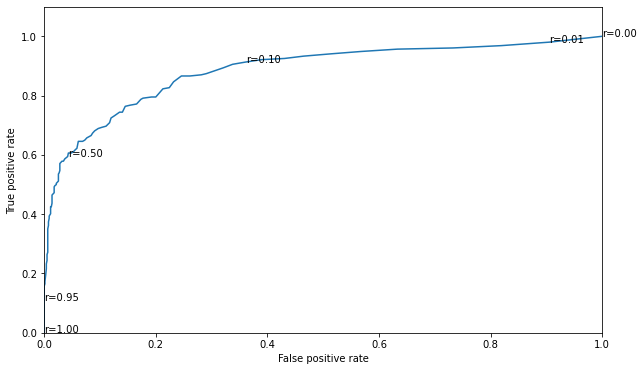

In [34]:
true_positive_rate = []
false_positive_rate = []

positive_class = 'Female'
negative_class = 'Male'

P = np.sum(Y_test == positive_class) # Sums how many positive examples in test data
N = np.sum(Y_test == negative_class)

threshold = np.linspace(0.00, 1, 101) #np.linspace(start, stop, steps)
model = skl_da.LinearDiscriminantAnalysis()
#model = skl_da.QuadraticDiscriminantAnalysis()
model.fit(X_train, Y_train)
predict_prob = model.predict_proba(X_test)
positive_class_index = np.argwhere(model.classes_ == positive_class).squeeze()

for r in threshold:
        predicition = np.where(predict_prob[:, positive_class_index] > r,
                              positive_class,
                              negative_class)
        FP = np.sum((predicition==positive_class)&(Y_test==negative_class)) #False negatives
        TP = np.sum((predicition==positive_class)&(Y_test==positive_class))
        
        false_positive_rate.append(FP/N)
        true_positive_rate.append(TP/P)
        
plt.plot(false_positive_rate, true_positive_rate);
for idx in [0, 1, 10, 50, 95, 100]:
    plt.text(false_positive_rate[idx], true_positive_rate[idx], f"r={threshold[idx]:.2f}")
plt.xlim([0,1]);
plt.ylim([0,1.1]);
plt.xlabel('False positive rate');
plt.ylabel('True positive rate');

In [35]:
#
skl_met.roc_auc_score(Y_train, model.predict_proba(X_train)[:,1])

0.8836200411254326

In [36]:
#Feature engineering
# Introducing new variables by transformations
data = dataset.copy()
data['Lead'] = pd.get_dummies(data['Lead'])
data['Number of words co-lead'] = data['Number of words lead'] - data['Difference in words lead and co-lead']
data['Proportion of words lead'] = data['Number of words lead']/data['Total words']
data['Proportion of words co-lead'] = data['Number of words co-lead']/data['Total words']
data['Ratio words co-lead lead'] = data['Number of words co-lead']/data['Number of words lead']
data['Proportion of words female'] = data['Number words female']/(data['Total words'] - data['Number of words lead'])
data['Proportion of female actors'] = data['Number of female actors']/(data['Number of male actors'] + data['Number of female actors'])
data['Older lead'] = data['Age Lead'] < data['Age Co-Lead']
data['Older lead'] = pd.get_dummies(data['Older lead'])

data.columns


Index(['index', 'Number words female', 'Total words', 'Number of words lead',
       'Difference in words lead and co-lead', 'Number of male actors', 'Year',
       'Number of female actors', 'Number words male', 'Gross',
       'Mean Age Male', 'Mean Age Female', 'Age Lead', 'Age Co-Lead', 'Lead',
       'Number of words co-lead', 'Proportion of words lead',
       'Proportion of words co-lead', 'Ratio words co-lead lead',
       'Proportion of words female', 'Proportion of female actors',
       'Older lead'],
      dtype='object')

In [37]:
X = pre_process(dataset).drop(columns=['Lead', 'index', 'Number words female', 'Number words male', 'Number of words lead', 'Difference in words lead and co-lead', 'Number of male actors', 'Gross', 'Year', 'Ratio words co-lead lead'])
X

,Total words,Number of female actors,Mean Age Male,Mean Age Female,Age Lead,Age Co-Lead,Number of words co-lead,Proportion of words lead,Proportion of words co-lead,Proportion of words female,Proportion of female actors,Older lead,Number of actors
0,6394,5,51.500000,42.333333,46.0,65.0,1908.0,0.352049,0.298405,0.364953,0.714286,0,7
1,8780,4,39.125000,29.333333,58.0,34.0,801.0,0.230068,0.091230,0.225444,0.307692,1,13
2,4176,1,42.500000,37.000000,46.0,37.0,155.0,0.225575,0.037117,0.047928,0.125000,1,8
3,9855,2,35.222222,21.500000,33.0,23.0,817.0,0.349061,0.082902,0.167264,0.142857,1,14
4,7688,4,45.250000,45.000000,36.0,39.0,686.0,0.498829,0.089230,0.341812,0.333333,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,2398,2,43.200000,31.000000,46.0,24.0,168.0,0.556297,0.070058,0.284774,0.285714,1,7
1035,8404,2,37.166667,24.000000,21.0,34.0,1765.0,0.232270,0.210019,0.097954,0.250000,0,8
1036,2750,3,27.500000,27.666667,28.0,25.0,521.0,0.318909,0.189455,0.707955,0.600000,1,5
1037,3994,3,42.857143,38.500000,29.0,32.0,723.0,0.194041,0.181022,0.143523,0.272727,0,11


In [38]:
#X = dataset.drop(columns=['Lead'])
#X = pre_process(dataset).drop(columns=['Lead', 'index'])
X = pre_process(dataset).drop(columns=['Lead', 'index', 'Number words female', 'Number words male', 'Number of words lead', 'Difference in words lead and co-lead', 'Number of male actors','Ratio words co-lead lead', 'Year'])
X2 = pre_process(dataset).drop(columns=['Lead', 'index', 'Number words female', 'Number words male', 'Number of words lead', 'Difference in words lead and co-lead', 'Number of male actors', 'Ratio words co-lead lead', 'Year'])
Y = dataset['Lead']

# List of models
models = []
models.append(skl_lm.LogisticRegression(solver='liblinear'))
models.append(skl_da.LinearDiscriminantAnalysis())
models.append(skl_da.QuadraticDiscriminantAnalysis())

n_fold=10
accuracy = np.zeros((n_fold, len(models)))
accuracy2 = np.zeros((n_fold, len(models)))
model_accuracy = np.zeros(len(models))
model_accuracy2 = np.zeros(len(models))


cv = skl_ms.KFold(n_splits=n_fold, shuffle=True)

for i, (train_index, val_index) in enumerate(cv.split(X)):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    X2_train, X2_val = X2.iloc[train_index], X2.iloc[val_index]
    Y_train, Y_val = Y.iloc[train_index], Y.iloc[val_index]
    
    for m in range(np.shape(models)[0]):
        model = models[m]
        model.fit(X_train, Y_train)
        prediction = model.predict(X_val)
        accuracy[i,m] = np.mean(prediction == Y_val)
        model_accuracy[m] += accuracy[i,m]
        
        model.fit(X2_train, Y_train)
        prediction = model.predict(X2_val)
        accuracy[i,m] = np.mean(prediction == Y_val)
        model_accuracy2[m] += accuracy[i,m]

for m in range(np.shape(models)[0]):
    print('Model accuracy change after transformation ' + str(models[m]) + ' is ')
    print((model_accuracy2[m]-model_accuracy[m])/n_fold)
    
    

Model accuracy change after transformation LogisticRegression(solver='liblinear') is 
0.0
Model accuracy change after transformation LinearDiscriminantAnalysis() is 
0.0
Model accuracy change after transformation QuadraticDiscriminantAnalysis() is 
0.0


In [95]:
X = pre_process(dataset).drop(columns=['Proportion of words female', 'Lead', 'index', 'Number words female', 'Number words male', 'Number of words lead', 'Difference in words lead and co-lead', 'Number of male actors', 'Gross', 'Year', 'Ratio words co-lead lead'])
# Above maximizes accuracy for QDA
#X = dataset.drop(columns=['Lead'])
#X = pre_process(dataset).drop(columns=['Lead', 'index'])
#X2 = pre_process(dataset).drop(columns=['Lead', 'index', 'Number words female', 'Number words male', 'Number of words lead', 'Difference in words lead and co-lead'])
Y = dataset['Lead']

# List of models
models = []
models.append(skl_lm.LogisticRegression(solver='liblinear'))
models.append(skl_da.LinearDiscriminantAnalysis())
models.append(skl_da.QuadraticDiscriminantAnalysis())

n_fold=50
accuracy = np.zeros((n_fold, len(models)))
#accuracy2 = np.zeros((n_fold, len(models)))
model_accuracy = np.zeros(len(models))
#model_accuracy2 = np.zeros(len(models))
cv = skl_ms.KFold(n_splits=n_fold, shuffle=True)

for i, (train_index, val_index) in enumerate(cv.split(X)):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    #X2_train, X2_val = X2.iloc[train_index], X2.iloc[val_index]
    Y_train, Y_val = Y.iloc[train_index], Y.iloc[val_index]
    
    for m in range(np.shape(models)[0]):
        model = models[m]
        model.fit(X_train, Y_train)
        prediction = model.predict(X_val)
        accuracy[i,m] = np.mean(prediction == Y_val)
        model_accuracy[m] += accuracy[i,m]
        
        #model.fit(X2_train, Y_train)
        #prediction = model.predict(X2_val)
        #accuracy[i,m] = np.mean(prediction == Y_val)
        #model_accuracy2[m] += accuracy[i,m]

for m in range(np.shape(models)[0]):
    print('Model accuracy ' + str(models[m]) + ' is ')
    print(model_accuracy[m]/n_fold)

Model accuracy LogisticRegression(solver='liblinear') is 
0.7952380952380955
Model accuracy LinearDiscriminantAnalysis() is 
0.8123809523809526
Model accuracy QuadraticDiscriminantAnalysis() is 
0.8189523809523811


In [40]:
def fit_and_test(classifier, train, test, features, target, suppress_output = False):
    classifier.fit(train[features], train[target])
    if not suppress_output:
        skl_met.plot_roc_curve(classifier, test[features], test[target])
        print('accuracy: ' + str(classifier.score(test[features], test[target])))
        print('     auc: ' + str(skl_met.roc_auc_score(test[target], classifier.predict_proba(test[features])[:,1])) + '\n')
        print(skl_met.classification_report(test[target], classifier.predict(test[features])))
    return classifier

accuracy: 0.9455128205128205
     auc: 0.9886456239474113

              precision    recall  f1-score   support

           0       0.99      0.94      0.96       233
           1       0.84      0.96      0.90        79

    accuracy                           0.95       312
   macro avg       0.92      0.95      0.93       312
weighted avg       0.95      0.95      0.95       312



QuadraticDiscriminantAnalysis()

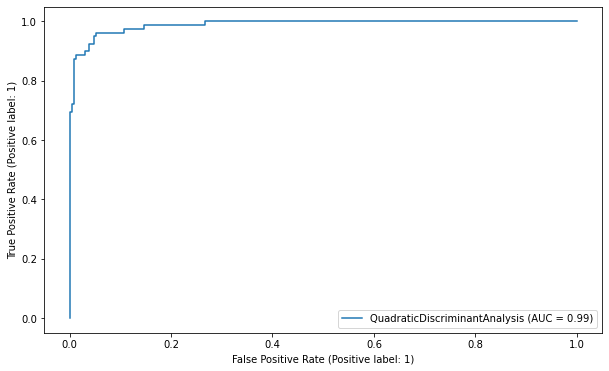

In [62]:
classifier = skl_da.QuadraticDiscriminantAnalysis()
X = pre_process(dataset).drop(columns=['index', 'Number words female', 'Number words male', 'Number of words lead', 'Difference in words lead and co-lead', 'Number of male actors'])
#X = dataset
#features = [
#    'Number words female',
#    'Total words',
#    'Number of words lead',
#    'Difference in words lead and co-lead',
#    'Number of male actors',
#    'Year',
#    'Number of female actors',
#    'Number words male',
#    'Gross',
#    'Mean Age Male',
#    'Mean Age Female',
#    'Age Lead',
#    'Age Co-Lead'
#]

features = [
    'Year',
    'Gross',
    'Number of actors',
    'Proportion of female actors',
    'Mean Age Male',
    'Mean Age Female',
    'Age Lead',
    'Age Co-Lead',
    'Total words',
    'Proportion of words lead',
    'Proportion of words co-lead',
    'Ratio words co-lead lead',
    'Proportion of words female',
    'Older lead',
]
target = 'Lead'
train, test = skl_ms.train_test_split(X, test_size=0.3)
fit_and_test(classifier, train, test, features, target)

In [42]:
X[features]

,Year,Gross,Number of actors,Proportion of female actors,Mean Age Male,Mean Age Female,Age Lead,Age Co-Lead,Total words,Proportion of words lead,Proportion of words co-lead,Ratio words co-lead lead,Proportion of words female,Older lead
0,1995,142.0,7,0.714286,51.500000,42.333333,46.0,65.0,6394,0.352049,0.298405,0.847623,0.364953,0
1,2001,37.0,13,0.307692,39.125000,29.333333,58.0,34.0,8780,0.230068,0.091230,0.396535,0.225444,1
2,1968,376.0,8,0.125000,42.500000,37.000000,46.0,37.0,4176,0.225575,0.037117,0.164544,0.047928,1
3,2002,19.0,14,0.142857,35.222222,21.500000,33.0,23.0,9855,0.349061,0.082902,0.237500,0.167264,1
4,1988,40.0,12,0.333333,45.250000,45.000000,36.0,39.0,7688,0.498829,0.089230,0.178879,0.341812,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,1973,174.0,7,0.285714,43.200000,31.000000,46.0,24.0,2398,0.556297,0.070058,0.125937,0.284774,1
1035,1992,172.0,8,0.250000,37.166667,24.000000,21.0,34.0,8404,0.232270,0.210019,0.904201,0.097954,0
1036,2000,53.0,5,0.600000,27.500000,27.666667,28.0,25.0,2750,0.318909,0.189455,0.594071,0.707955,1
1037,1996,32.0,11,0.272727,42.857143,38.500000,29.0,32.0,3994,0.194041,0.181022,0.932903,0.143523,0


In [43]:
%%time
B = 400
accuracies = []
aucs = []
for i in range(B):
    train, test = skl_ms.train_test_split(X, test_size=0.1)
    logRegLasso = fit_and_test(classifier, train, test, features, target, suppress_output=True)
    accuracies.append(logRegLasso.score(test[features], test[target]))
    aucs.append(skl_met.roc_auc_score(test[target], logRegLasso.predict_proba(test[features])[:,1]))

CPU times: user 3.64 s, sys: 5.59 s, total: 9.24 s
Wall time: 2.32 s


In [44]:
print('mean accuracy: ' + str(np.mean(accuracies)))
print('     mean auc: ' + str(np.mean(aucs)))

print('     std auc: ' + str(np.std(accuracies)))
print('     std auc: ' + str(np.std(aucs)))

mean accuracy: 0.9414423076923077
     mean auc: 0.9763257028392174
     std auc: 0.02306069140693054
     std auc: 0.01970257965207549


In [49]:
classifier = skl_da.QuadraticDiscriminantAnalysis()
factors = [
    'Year',
    'Gross',
    'Number of actors',
    'Proportion of female actors',
    'Mean Age Male',
    'Mean Age Female',
    'Age Lead',
    'Age Co-Lead',
    'Total words',
    'Proportion of words lead',
    'Proportion of words co-lead',
    'Ratio words co-lead lead',
    'Proportion of words female',
    'Older lead',
]
target = 'Lead'
X = pre_process(dataset).drop(columns=['Difference in words lead and co-lead','Number of female actors','Number of male actors','Number of words co-lead','Number of words lead','Number words female','Number words male','index'])
#for feature in features:
#    X[feature + '2'] = X[feature]**2
#    X[feature + '3'] = X[feature]**3
    
#all_features = features + [feature + '2' for feature in features] + [feature + '3' for feature in features]
max_accuracy = 0
max_auc = 0
best_features_accuracy = {}
best_features_auc = {}
B = 1 #number of bootstrapped training sets
for features in itertools.combinations(factors, len(factors)-4):
    accuracies = []
    aucs = []
    for i in range(B):
        train, test = skl_ms.train_test_split(X, train_size=0.3)
        logRegLasso = fit_and_test(classifier, train, test, set(features), target, suppress_output=True)
        accuracies.append(logRegLasso.score(test[set(features)], test[target]))
        aucs.append(skl_met.roc_auc_score(test[target], logRegLasso.predict_proba(test[set(features)])[:,1]))
        accuracy = np.mean(accuracies)
        auc = np.mean(aucs)
    if accuracy > max_accuracy:
        max_accuracy = accuracy
        best_features_accuracy = set(features)
    if auc > max_auc:
        max_auc = auc
        best_features_auc = set(features)

print(f'Maximum accuracy: {max_accuracy:.3f}')
print('Best accuracy features', best_features_accuracy)
print(f'Maximum auc: {max_auc:.4f}')
print('Best AUC features', best_features_auc) 
print(set(factors)-set(best_features_accuracy))
print(set(factors)-set(best_features_auc))
print(set(factors)==set(best_features_accuracy))
print(set(factors)==set(best_features_auc))

Maximum accuracy: 0.951
Best accuracy features {'Age Co-Lead', 'Number of actors', 'Year', 'Age Lead', 'Proportion of words co-lead', 'Proportion of words lead', 'Proportion of female actors', 'Total words', 'Mean Age Female', 'Proportion of words female'}
Maximum auc: 0.9828
Best AUC features {'Number of actors', 'Year', 'Mean Age Male', 'Older lead', 'Proportion of words co-lead', 'Proportion of words lead', 'Proportion of female actors', 'Total words', 'Mean Age Female', 'Proportion of words female'}
{'Ratio words co-lead lead', 'Gross', 'Older lead', 'Mean Age Male'}
{'Age Lead', 'Ratio words co-lead lead', 'Age Co-Lead', 'Gross'}
False
False


In [ ]:
features = [
    'Year',
    'Gross',
    'Number of actors',
    'Proportion of female actors',
    'Mean Age Male',
    'Mean Age Female',
    'Age Lead',
    'Age Co-Lead',
    'Total words',
    'Proportion of words lead',
    'Proportion of words co-lead',
    'Ratio words co-lead lead',
    'Proportion of words female',
    'Older lead',
]
X = pre_process(dataset).drop(columns=['Difference in words lead and co-lead', 'Lead','Number of female actors','Number of male actors','Number of words co-lead','Number of words lead','Number words female','Number words male','index'])
X

#X = X['Year',
#    'Gross',
#    'Number of actors',
#    'Proportion of female actors',
#    'Mean Age Male',
#    'Mean Age Female',
#    'Age Lead',
#    'Age Co-Lead',
#    'Total words',
#    'Proportion of words lead',
#    'Proportion of words co-lead',
#    'Ratio words co-lead lead',
#    'Proportion of words female',
#    'Older lead']


In [ ]:
'Year', 'Gross', 'Number of actors', 'Proportion of female actors', 'Mean Age Male', 'Mean Age Female', 'Age Lead', 'Age Co-Lead', 'Total words', 'Proportion of words lead', 'Proportion of words co-lead', 'Ratio words co-lead lead', 'Proportion of words female', 'Older lead')

In [ ]:
itertools.combinations(features, 5)